# Looks at output of early coupled GEM runs

Using the coupler history file output at 3hr coupling interval

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from mpl_toolkits.axes_grid1 import AxesGrid
from cartopy.mpl.geoaxes import GeoAxes
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import fstd2nc
import cftime
#import iris
#import iris.analysis.cartography
#import iris.plot as iplt
#import iris.quickplot as qplt

In [2]:


#ds_cpl_his = xr.open_dataset('/space/hall6/sitestore/eccc/crd/ccrn/ccrn_tmp/rcs001/gem_test_bus_update_3718073/work/cpl_history.nc')
#ds_cpl_his = xr.open_dataset('/space/hall6/sitestore/eccc/crd/ccrn/ccrn_tmp/rcs001/canesm5.2rc_gem_test_3451105/work/cpl_history.nc')
#ds_cpl_his = xr.open_dataset('/space/hall6/sitestore/eccc/crd/ccrn/ccrn_tmp/rcs001/canesm5.2rc_gem_test_1390073/work/cpl_history.nc')
#ds_cpl_his = xr.open_dataset('/space/hall6/sitestore/eccc/crd/ccrn/ccrn_tmp/rcs001/canesm5.2rc_gem_test_2702758/work/cpl_history.nc')
ds_cpl_his = xr.open_dataset('/space/hall6/sitestore/eccc/crd/ccrn/users/ncs001/canesm_runs/v6a3-3-cplhis-01/data/mc_v6a3-3-cplhis-01_1952_m01_cplhist.nc.001',
                              chunks={'time':250})  # CanESM6-a3.3

In [3]:
ds_cpl_his

<xarray.Dataset>
Dimensions:                                                       (time: 2921,
                                                                   nlat_atm_yin: 115,
                                                                   nlon_atm_yin: 303,
                                                                   nlat_atm_yang: 115,
                                                                   nlon_atm_yang: 303,
                                                                   nlat_ocn: 332,
                                                                   nlon_ocn: 362)
Coordinates:
  * time                                                          (time) object ...
Dimensions without coordinates: nlat_atm_yin, nlon_atm_yin, nlat_atm_yang,
                                nlon_atm_yang, nlat_ocn, nlon_ocn
Data variables: (12/113)
    lon_atm_yin                                                   (nlat_atm_yin, nlon_atm_yin) float64 dask.array<chunksize=(115, 303), meta=np.ndarray>
    lat_atm_yin                                                   (nlat_atm_yin, nlon_atm_yin) float64 dask.array<chunksize=(115, 303), meta=np.ndarray>
    lon_atm_yang                                                  (nlat_atm_yang, nlon_atm_yang) float64 dask.array<chunksize=(115, 303), meta=np.ndarray>
    lat_atm_yang                                                  (nlat_atm_yang, nlon_atm_yang) float64 dask.array<chunksize=(115, 303), meta=np.ndarray>
    lon_ocn                                                       (nlat_ocn, nlon_ocn) float64 dask.array<chunksize=(332, 362), meta=np.ndarray>
    lat_ocn                                                       (nlat_ocn, nlon_ocn) float64 dask.array<chunksize=(332, 362), meta=np.ndarray>
    ...                                                            ...
    atm_yang2ocn_srcmaskF_dstmaskT_conserve_2nd_fracarea_srcfrac  (nlat_atm_yang, nlon_atm_yang) float64 dask.array<chunksize=(115, 303), meta=np.ndarray>
    atm_yang2ocn_srcmaskF_dstmaskT_conserve_2nd_fracarea_dstfrac  (nlat_ocn, nlon_ocn) float64 dask.array<chunksize=(332, 362), meta=np.ndarray>
    atm_yin2ocn_srcmaskF_dstmaskT_conservative_fracarea_srcfrac   (nlat_atm_yin, nlon_atm_yin) float64 dask.array<chunksize=(115, 303), meta=np.ndarray>
    atm_yin2ocn_srcmaskF_dstmaskT_conservative_fracarea_dstfrac   (nlat_ocn, nlon_ocn) float64 dask.array<chunksize=(332, 362), meta=np.ndarray>
    atm_yang2ocn_srcmaskF_dstmaskT_conservative_fracarea_srcfrac  (nlat_atm_yang, nlon_atm_yang) float64 dask.array<chunksize=(115, 303), meta=np.ndarray>
    atm_yang2ocn_srcmaskF_dstmaskT_conservative_fracarea_dstfrac  (nlat_ocn, nlon_ocn) float64 dask.array<chunksize=(332, 362), meta=np.ndarray>
Attributes:
    CCCma_runid:  v6a3-3-cplhis-01

In [4]:
2921*3/24

365.125

In [5]:
def plot_nemo_field(nemo_lon, nemo_lat, nemo_field, **kwargs):
    '''Plot NEMO fields. Does not work well without using iris. '''
    data_crs = ccrs.PlateCarree()
    fig = plt.figure(figsize=(8,14))
    axes_class = (GeoAxes,
                      dict(projection=data_crs))
    grid = AxesGrid(fig, 111, axes_class=axes_class,
                        nrows_ncols=(1, 1),
                        axes_pad=0.25,
                        cbar_location='right',
                        cbar_mode='single',
                        cbar_pad=0.1,
                        cbar_size='3%',
                        label_mode='')  # note the empty label_modead=0.05

    axl = grid[0]
    cm=axl.contourf(nemo_lon, nemo_lat, nemo_field,transform=data_crs, **kwargs)
    axl.coastlines(linewidth=0.1)  
    grid.cbar_axes[0].colorbar(cm,extend='both')

In [6]:
def plot_yg_fields(yin_rlon, yin_rlat, yin_field, yan_rlon, yan_rlat, yan_field, **kwargs):
    '''Create a compound figure of Yin/Yang panels, plotted in rotated coordinates.
    '''
    fig = plt.figure(figsize=(8,14))

    rotated_yan = ccrs.RotatedPole(pole_latitude=8.050,pole_longitude=352.579, central_rotated_longitude=180)
    rotated_yin = ccrs.RotatedPole(pole_latitude=31.758,pole_longitude=87.597)
    data_crs = ccrs.PlateCarree()

    axes_class = (GeoAxes,
                      dict(projection=data_crs))


    grid = AxesGrid(fig, 111, axes_class=axes_class,
                        nrows_ncols=(2, 1),
                        axes_pad=0.25,
                        cbar_location='right',
                        cbar_mode='single',
                        cbar_pad=0.1,
                        cbar_size='3%',
                        label_mode='')  # note the empty label_modead=0.05

    axl = grid[0]
    axl.contourf(yin_rlon, yin_rlat, yin_field,transform=rotated_yin, **kwargs)
    axl.coastlines(linewidth=0.1)  

    axr = grid[1]
    cm = axr.contourf(yan_rlon+180, yan_rlat, yan_field, transform=rotated_yan, **kwargs)
    axr.coastlines(linewidth=0.1)
    grid.cbar_axes[0].colorbar(cm,extend='both')

In [7]:
def plot_yg_fields_true(yin_lon, yin_lat, yin_field, yan_lon, yan_lat, yan_field, **kwargs):
    '''Create a compound figure of Yin/Yang panels, plotted in rotated coordinates.
    '''
    fig = plt.figure(figsize=(8,14))

    rotated_yan = ccrs.RotatedPole(pole_latitude=8.050,pole_longitude=352.579, central_rotated_longitude=180)
    rotated_yin = ccrs.RotatedPole(pole_latitude=31.758,pole_longitude=87.597)
    data_crs = ccrs.PlateCarree()

    axes_class = (GeoAxes,
                      dict(projection=data_crs))


    grid = AxesGrid(fig, 111, axes_class=axes_class,
                        nrows_ncols=(2, 1),
                        axes_pad=0.25,
                        cbar_location='right',
                        cbar_mode='single',
                        cbar_pad=0.1,
                        cbar_size='3%',
                        label_mode='')  # note the empty label_modead=0.05

    axl = grid[0]
    axl.contourf(yin_lon, yin_lat, yin_field,transform=data_crs, **kwargs)
    axl.coastlines(linewidth=0.1)  

    axr = grid[1]
    cm = axr.contourf(yan_lon, yan_lat, yan_field, transform=data_crs, **kwargs)
    axr.coastlines(linewidth=0.1)
    grid.cbar_axes[0].colorbar(cm,extend='both')

# Plot NEMO heat flux (BEGO)

In [8]:
# Read coordinates from a NEMO mesh file as coupler history ones are invalid
ds_mesh = xr.open_dataset('/home/ncs001/site5/gemdc-tests/yy_out/mc_ncs-pict-02_6001_m01_mesh_mask.nc')

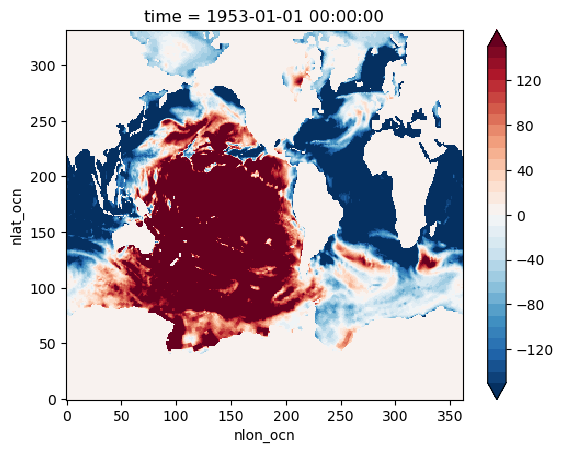

In [9]:
# plot the data on the NEMO grid. Projecting it does not work well in cartopy - you must remap or use iris.
# For the last timestep
bego_nemo = (ds_cpl_his.O_QsrMix + ds_cpl_his.O_QnsMix)
bego_nemo.isel(time=2920).plot(cmap='RdBu_r', levels=np.arange(-150,160,10))

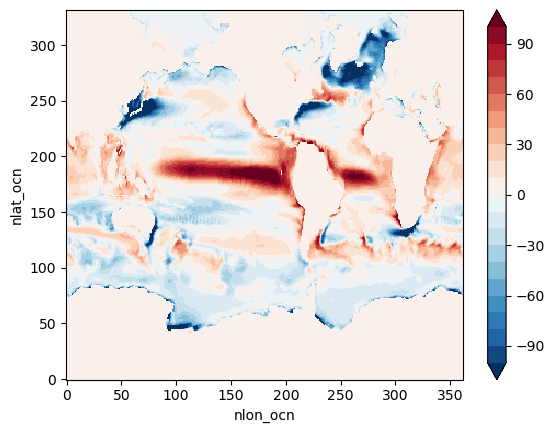

In [10]:
# On average
bego_nemo.mean(dim='time').plot(cmap='RdBu_r', levels=np.arange(-100,110,10))

# Plot YG data (BEGO)

In [11]:
# These are outputs from a CanAM-GEM AMIP run on the 303x115 grid
ds_amip_yin = xr.open_dataset('/home/ncs001/site5/gemdc-tests/yy_out/yy_out_ng/BEGO_2003010100_00000006_yin.nc')
ds_amip_yan = xr.open_dataset('/home/ncs001/site5/gemdc-tests/yy_out/yy_out_ng/BEGO_2003010100_00000006_yan.nc')

In [12]:
# Use AMIP rlon/rlat along with the coupler history file fields to make sensible plots
# For the last step
plot_yg_fields(ds_amip_yin.rlon, ds_amip_yin.rlat, ds_cpl_his.BEGO_atm_yin.isel(time=2920), 
               ds_amip_yan.rlon, ds_amip_yan.rlat, ds_cpl_his.BEGO_atm_yang.isel(time=2920), 
               cmap='RdBu_r', levels=np.arange(-1500,1600,100))

/home/ncs001/.conda/envs/gem-vis/lib/python3.9/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


URLError: <urlopen error [Errno 110] Connection timed out>

<Figure size 800x1400 with 4 Axes>

In [13]:
# On average
# Use AMIP rlon/rlat along with the coupler history file fields to make sensible plots
plot_yg_fields(ds_amip_yin.rlon, ds_amip_yin.rlat, ds_cpl_his.BEGO_atm_yin.mean(dim='time'), 
               ds_amip_yan.rlon, ds_amip_yan.rlat, ds_cpl_his.BEGO_atm_yang.mean(dim='time'), 
               cmap='RdBu_r', levels=np.arange(-200,210,10))


/home/ncs001/.conda/envs/gem-vis/lib/python3.9/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


URLError: <urlopen error [Errno 110] Connection timed out>

<Figure size 800x1400 with 4 Axes>

In [14]:
# Output of BEGO from the AMIP run, for comparison (note this is a timestrp snapshot, and the above is a 3hr average, so smoother / smaller)
plot_yg_fields(ds_amip_yin.rlon, ds_amip_yin.rlat, ds_amip_yin.BEGO.isel(time=0), 
               ds_amip_yan.rlon, ds_amip_yan.rlat, ds_amip_yan.BEGO.isel(time=0), 
               cmap='RdBu_r', levels=np.arange(-250,260,10))

URLError: <urlopen error [Errno 110] Connection timed out>

<Figure size 800x1400 with 4 Axes>

# Look at GT

In [15]:
# Use AMIP rlon/rlat along with the coupler history file fields to make sensible plots
# For the last step
plot_yg_fields(ds_amip_yin.rlon, ds_amip_yin.rlat, ds_cpl_his.GT_atm_yin.isel(time=1)-273.15, 
               ds_amip_yan.rlon, ds_amip_yan.rlat, ds_cpl_his.GT_atm_yang.isel(time=1)-273.15, 
               cmap='RdBu_r', levels=np.arange(-20,40,5))

/home/ncs001/.conda/envs/gem-vis/lib/python3.9/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


URLError: <urlopen error [Errno 110] Connection timed out>

<Figure size 800x1400 with 4 Axes>